In [4]:
from datetime import datetime
today = datetime.today().strftime("%Y-%m-%d")
filename = today+'_v1'


In [ ]:
#'XLP', 'XME', 'XOP', 'XLV', 'OIH', 'XBI', 'XLE', 'KRE', 'QQQ', 'GDXJ', 'INDA', 'IBB', 'SMH', 'XLB', 'XLF', 'XLK', 'XLI', 'XRT', 'GDX', 'VNQ', 'XLU', 'IWM', 'SPY', 'RSX', 'EWW', 'EWH', 'KWEB', 'EEM', 'FXI'

In [5]:
import datetime
from ib_insync import *
util.startLoop() 

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=3)

contracts = ['XLP', 'XME', 'XOP', 'XLV', 'OIH', 'XBI', 'XLE', 'KRE', 'QQQ', 'GDXJ', 'INDA', 'IBB', 'SMH', 'XLB', 'XLF', 'XLK', 'XLI', 'XRT', 'GDX', 'VNQ', 'XLU', 'IWM', 'SPY', 'RSX', 'EWW', 'EWH', 'KWEB', 'EEM', 'FXI'] #'OIH', 'GDXJ', 'GDX', 'XBI', 'SMH', 'KRE', 'XRT', 'XLE', 'FXI'
#contracts = ['XOP', ] 

print('# of contracts : ', contracts)

for contra in contracts:
    
    for dataty in ['HISTORICAL_VOLATILITY', 'OPTION_IMPLIED_VOLATILITY']:

    
        contract = Stock(contra, 'SMART', 'USD', primaryExchange='ARCA')

        dt = ''
        barsList = []
        while True:
            bars = ib.reqHistoricalData(
                    contract,
                    endDateTime=dt,
                    durationStr='1 Y',
                    barSizeSetting='1 DAY',
                    whatToShow=dataty, 
                    useRTH=True,
                    formatDate=1)
            if not bars:
                break
            barsList.append(bars)
            dt = bars[0].date
            #print(dt)
            if dt < datetime.datetime.strptime('2016-01-01', "%Y-%m-%d").date():
            #if dt < datetime.datetime.strptime('2018-01-01 16:00:00', "%Y-%m-%d %H:%M:%S"):
                #print('Breaking for time')
                break

        allBars = [b for bars in reversed(barsList) for b in bars]
        df = util.df(allBars)

        df.drop(df.columns[[6, 7]], inplace = True, axis=1)
#         display(df.head())
#         display(df.tail())
        #display(len(df))
        print(len(df), contra, dataty)
        
        if dataty == 'HISTORICAL_VOLATILITY':
            dty = 'hv'
        else:
            dty = 'iv'
            
        df.to_csv(r'../data/'+contract.symbol + '-' + dty + filename + '.csv',  index = False)

ib.disconnect()
print('******* Done *******')

# of contracts :  ['XLP', 'XME', 'XOP', 'XLV', 'OIH', 'XBI', 'XLE', 'KRE', 'QQQ', 'GDXJ', 'INDA', 'IBB', 'SMH', 'XLB', 'XLF', 'XLK', 'XLI', 'XRT', 'GDX', 'VNQ', 'XLU', 'IWM', 'SPY', 'RSX', 'EWW', 'EWH', 'KWEB', 'EEM', 'FXI']
1252 XLP HISTORICAL_VOLATILITY
1259 XLP OPTION_IMPLIED_VOLATILITY
1252 XME HISTORICAL_VOLATILITY
1259 XME OPTION_IMPLIED_VOLATILITY
1252 XOP HISTORICAL_VOLATILITY
1259 XOP OPTION_IMPLIED_VOLATILITY
1252 XLV HISTORICAL_VOLATILITY
1259 XLV OPTION_IMPLIED_VOLATILITY
1251 OIH HISTORICAL_VOLATILITY
1259 OIH OPTION_IMPLIED_VOLATILITY
1252 XBI HISTORICAL_VOLATILITY
1259 XBI OPTION_IMPLIED_VOLATILITY
1252 XLE HISTORICAL_VOLATILITY
1259 XLE OPTION_IMPLIED_VOLATILITY
1252 KRE HISTORICAL_VOLATILITY
1259 KRE OPTION_IMPLIED_VOLATILITY
1252 QQQ HISTORICAL_VOLATILITY
1259 QQQ OPTION_IMPLIED_VOLATILITY
1251 GDXJ HISTORICAL_VOLATILITY
1259 GDXJ OPTION_IMPLIED_VOLATILITY
1252 INDA HISTORICAL_VOLATILITY
1259 INDA OPTION_IMPLIED_VOLATILITY
1252 IBB HISTORICAL_VOLATILITY
1259 IBB OPTIO

In [6]:
import pandas
from datetime import datetime


files = ['XLP', 'XME', 'XOP', 'XLV', 'OIH', 'XBI', 'XLE', 'KRE', 'QQQ', 'GDXJ', 'INDA', 'IBB', 'SMH', 'XLB', 'XLF', 'XLK', 'XLI', 'XRT', 'GDX', 'VNQ', 'XLU', 'IWM', 'SPY', 'RSX', 'EWW', 'EWH', 'KWEB', 'EEM', 'FXI'] #'OIH', 'GDXJ', 'GDX', 'XBI', 'SMH', 'KRE', 'XRT', 'XLE', 'FXI' 

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
    USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
    USLaborDay, USThanksgivingDay

class USTradingCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
        USMartinLutherKingJr,
        USPresidentsDay,
        GoodFriday,
        USMemorialDay,
        Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
        USLaborDay,
        USThanksgivingDay,
        Holiday('Christmas', month=12, day=25, observance=nearest_workday)
    ]

def get_trading_close_holidays(year):
    inst = USTradingCalendar()
    return inst.holidays(datetime(year-1, 12, 31), datetime(year, 12, 31))

c2016 = get_trading_close_holidays(2016)
c2017 = get_trading_close_holidays(2017)
c2018 = get_trading_close_holidays(2018)
c2019 = get_trading_close_holidays(2019)
c2020 = get_trading_close_holidays(2020)

tc_closed = c2016.append([c2017, c2018, c2019, c2020])


tc_closed = tc_closed.to_frame()
# print(tc_closed)
tc_closed.to_csv (r'tc_closed'+datetime.today().strftime("%Y-%m-%d")+'.csv', index = True, header=True)


idag = datetime.today().strftime("%Y-%m-%d")

tc_full = pandas.date_range(start = '2016-01-01', end = idag, freq ='B' ).to_frame()
# print(tc_full)
#tc_full.to_csv (r'tc_full'+datetime.today().strftime("%Y-%m-%d")+'.csv', index = True, header=True)

tc_real = tc_full.index.difference(tc_closed.index).to_frame()
# print(tc_real)
#tc_real.to_csv (r'tc_real'+datetime.today().strftime("%Y-%m-%d")+'.csv', index = True, header=True)


for file in files:
    
    file_full = tc_real

    file_iv = file + '-' + 'iv' + filename + '.csv'
    file_hv = file + '-' + 'hv' + filename + '.csv'

    data_iv = pandas.read_csv('../data/'+ file_iv, parse_dates=True, index_col='date')
    data_iv.rename(columns={"open": "open_iv", "high": "high_iv", "low": "low_iv", "close": "close_iv"}, inplace=True)
    data_iv.drop(data_iv.columns[[4]], inplace = True, axis=1)

    data_hv = pandas.read_csv('../data/'+ file_hv, parse_dates=True, index_col='date')
    data_hv.rename(columns={"date": "date_hv", "open": "open_hv", "high": "high_hv", "low": "low_hv", "close": "close_hv"}, inplace=True)
    data_hv.drop(data_hv.columns[[4]], inplace = True, axis=1)

    print('Missing in', file_hv, file_full.index.difference(data_hv.index).strftime('%Y-%m-%d').ravel())
    print('Missing in', file_iv, file_full.index.difference(data_iv.index).strftime('%Y-%m-%d').ravel())
    print('*****')
    
    datajoin = file_full.join(data_hv)
    print('Number of NAN :', datajoin.isna().values.sum())
    datajoin = datajoin.join(data_iv)
    print('Number of NAN :', datajoin.isna().values.sum())
    
    datajoin = datajoin.interpolate(method='linear', axis=0)
    print('Number of NAN after interpolate:', datajoin.isna().values.sum())

    datajoin.drop(datajoin.columns[[0]], inplace = True, axis=1) 
    
    datajoin.to_csv (r'../data/'+file+filename+'_dp.csv', index = True, header=True)
print('******* Done *******')

Missing in XLP-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2020-03-30']
Missing in XLP-iv2020-03-30_v1.csv ['2018-12-05' '2020-03-30']
*****
Number of NAN : 36
Number of NAN : 44
Number of NAN after interpolate: 0
Missing in XME-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2020-03-30']
Missing in XME-iv2020-03-30_v1.csv ['2018-12-05' '2020-03-30']
*****
Number of NAN : 36
Number of NAN : 44
Number of NAN after interpolate: 0
Missing in XOP-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2020-03-30']
Missing in XOP-iv2020-03-30_v1.csv ['2018-12-05' '2020-03-30']
*****
Number of NAN : 36
Number of NAN : 44
Number of NAN after interpolate: 0
Missing in XLV-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-1

Missing in EEM-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2020-03-30']
Missing in EEM-iv2020-03-30_v1.csv ['2018-12-05' '2020-03-30']
*****
Number of NAN : 36
Number of NAN : 44
Number of NAN after interpolate: 0
Missing in FXI-hv2020-03-30_v1.csv ['2018-12-05' '2018-12-12' '2018-12-13' '2018-12-14' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2020-03-30']
Missing in FXI-iv2020-03-30_v1.csv ['2018-12-05' '2020-03-30']
*****
Number of NAN : 36
Number of NAN : 44
Number of NAN after interpolate: 0
******* Done *******


Starting ...
* Done * : XBI  --- TG Value: -0.05  --- Smooth: 0 Process time:  0:03:05
Vote precision :0 --- # of raw votes : 0 # models : 0 --- % of models :0
------------------------------------------------------------------------
* Done * : XLV  --- TG Value: -0.05  --- Smooth: 0 Process time:  0:06:01
Vote precision :0 --- # of raw votes : 0 # models : 0 --- % of models :0
------------------------------------------------------------------------
* Done * : IWM  --- TG Value: -0.05  --- Smooth: 0 Process time:  0:08:58
Vote precision :0 --- # of raw votes : 0 # models : 0 --- % of models :0
------------------------------------------------------------------------
* Done * : XLB  --- TG Value: -0.05  --- Smooth: 0 Process time:  0:11:55
Vote precision :0 --- # of raw votes : 0 # models : 0 --- % of models :0
------------------------------------------------------------------------
* Done * : XLI  --- TG Value: -0.05  --- Smooth: 0 Process time:  0:14:54
Vote precision :0 --- # of raw vo

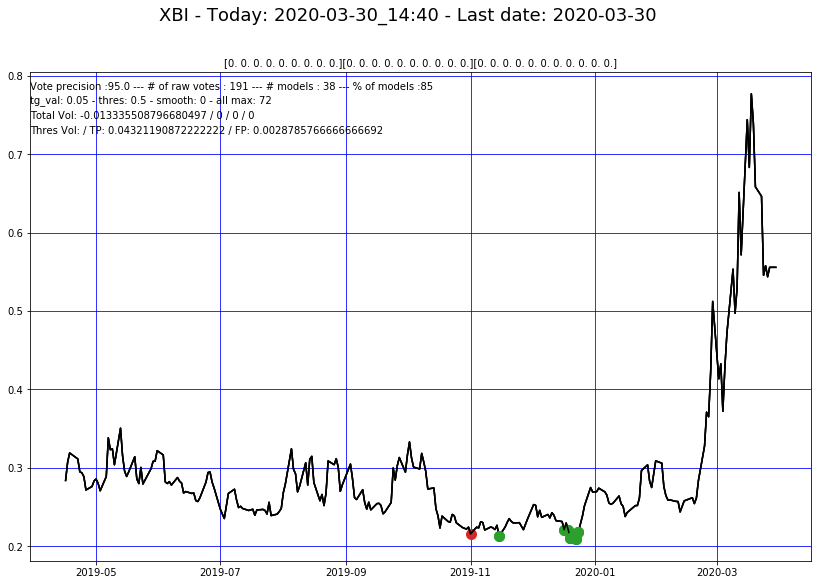

*****
* Done * : XLV  --- TG Value: 0.05  --- Smooth: 0 Process time:  0:20:54
Vote precision :82.0 --- # of raw votes : 223 # models : 45 --- % of models :99
------------------------------------------------------------------------


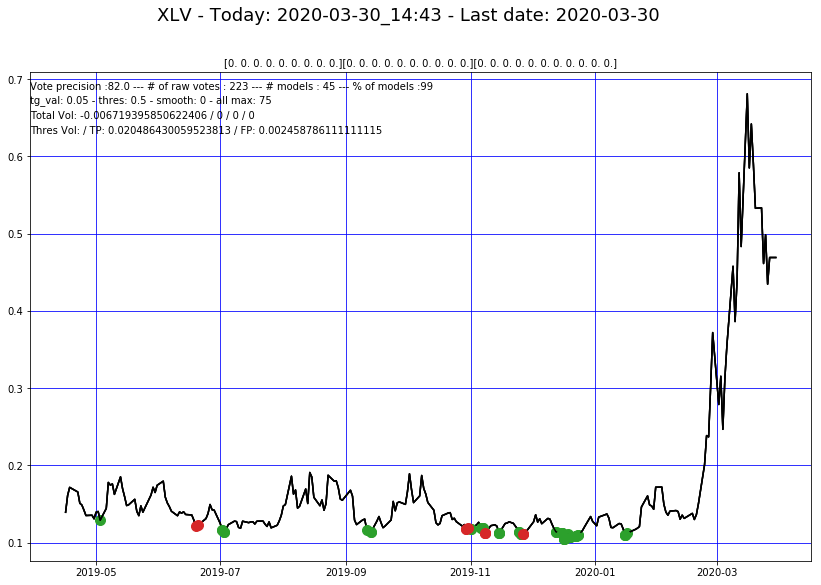

*****
* Done * : IWM  --- TG Value: 0.05  --- Smooth: 0 Process time:  0:23:57
Vote precision :76.0 --- # of raw votes : 152 # models : 30 --- % of models :68
------------------------------------------------------------------------


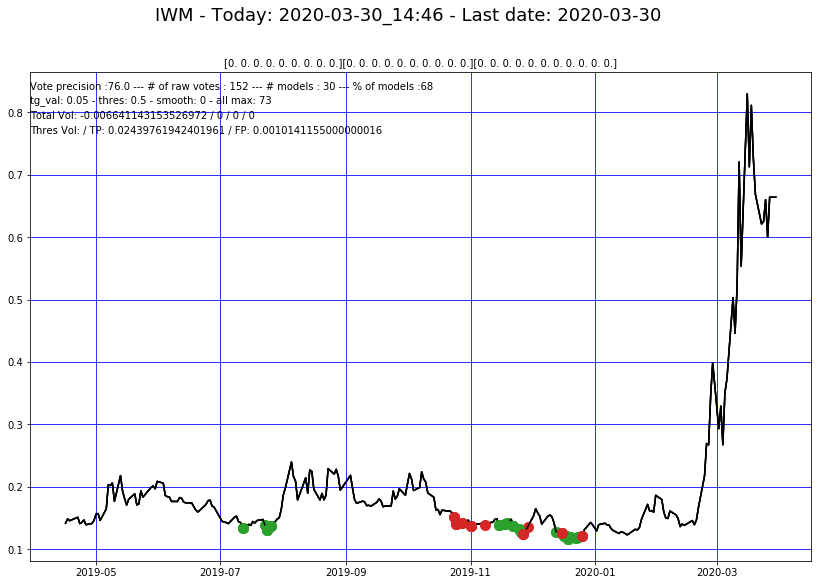

*****
* Done * : XLB  --- TG Value: 0.05  --- Smooth: 0 Process time:  0:26:58
Vote precision :79.0 --- # of raw votes : 135 # models : 27 --- % of models :60
------------------------------------------------------------------------


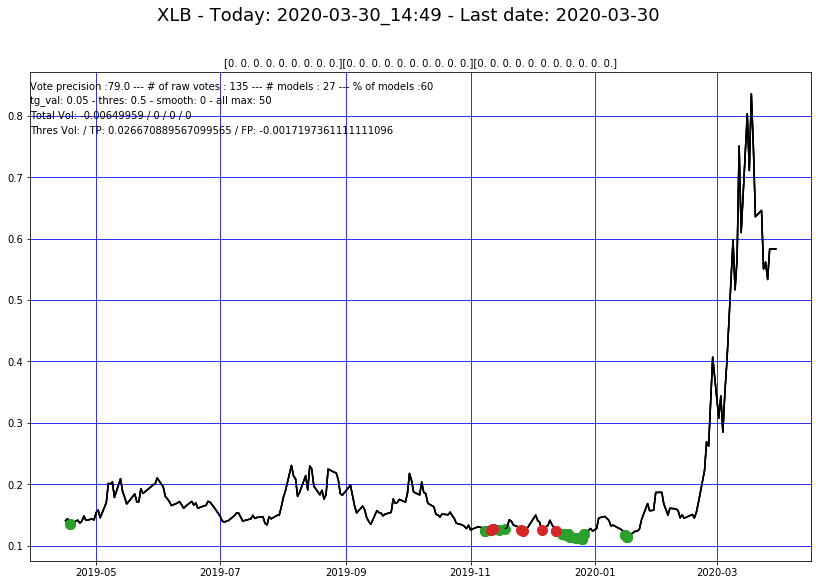

*****
* Done * : XLI  --- TG Value: 0.05  --- Smooth: 0 Process time:  0:30:02
Vote precision :83.0 --- # of raw votes : 217 # models : 43 --- % of models :96
------------------------------------------------------------------------


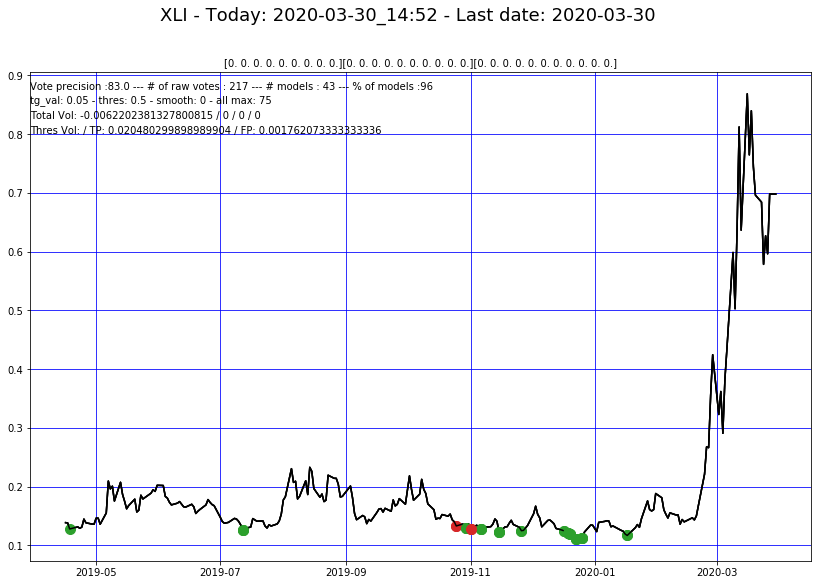

*****
* Done * : XBI  --- TG Value: 0.1  --- Smooth: 0 Process time:  0:33:04
Vote precision :100.0 --- # of raw votes : 27 # models : 5 --- % of models :12
------------------------------------------------------------------------


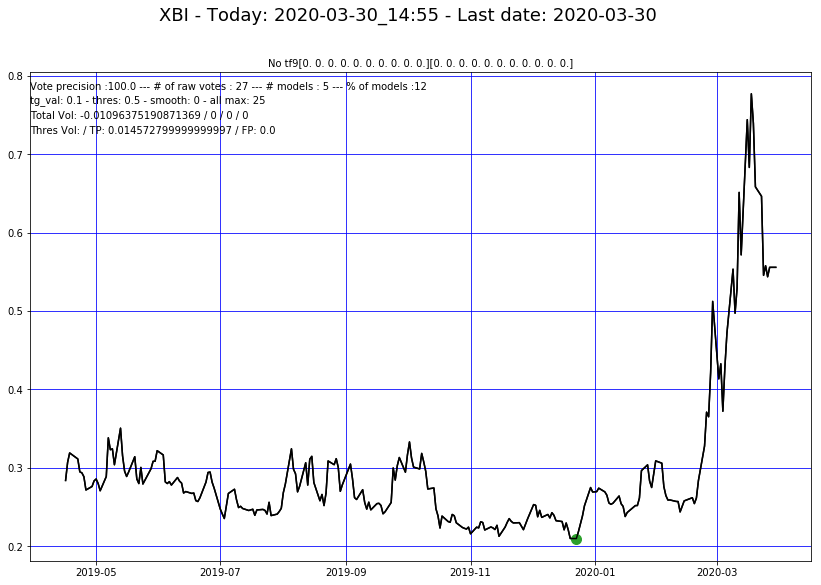

*****
* Done * : XLV  --- TG Value: 0.1  --- Smooth: 0 Process time:  0:36:05
Vote precision :85.0 --- # of raw votes : 78 # models : 16 --- % of models :35
------------------------------------------------------------------------


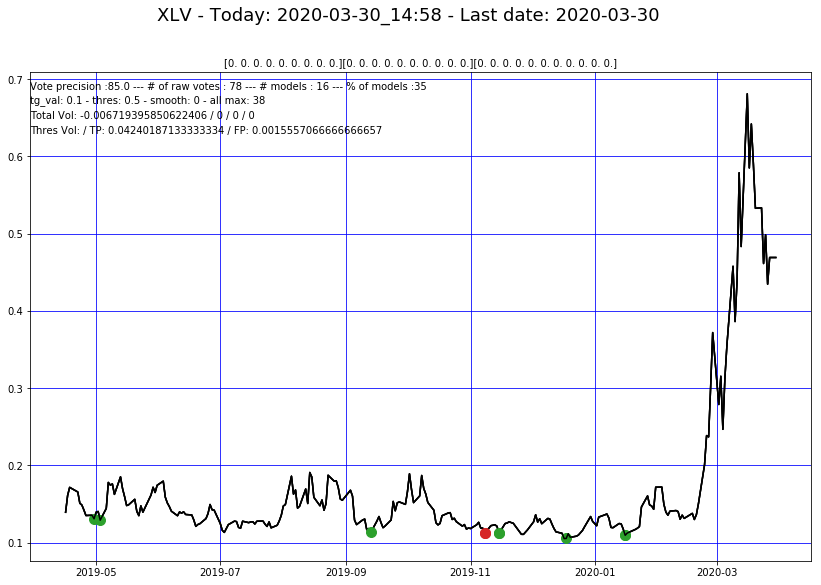

*****
* Done * : IWM  --- TG Value: 0.1  --- Smooth: 0 Process time:  0:39:02
Vote precision :86.0 --- # of raw votes : 164 # models : 33 --- % of models :73
------------------------------------------------------------------------


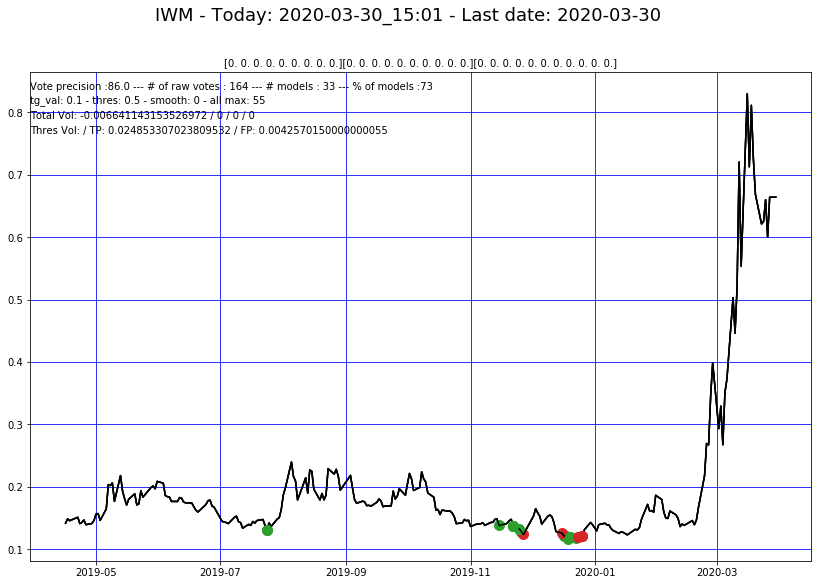

*****
* Done * : XLB  --- TG Value: 0.1  --- Smooth: 0 Process time:  0:42:02
Vote precision :90.0 --- # of raw votes : 168 # models : 34 --- % of models :75
------------------------------------------------------------------------


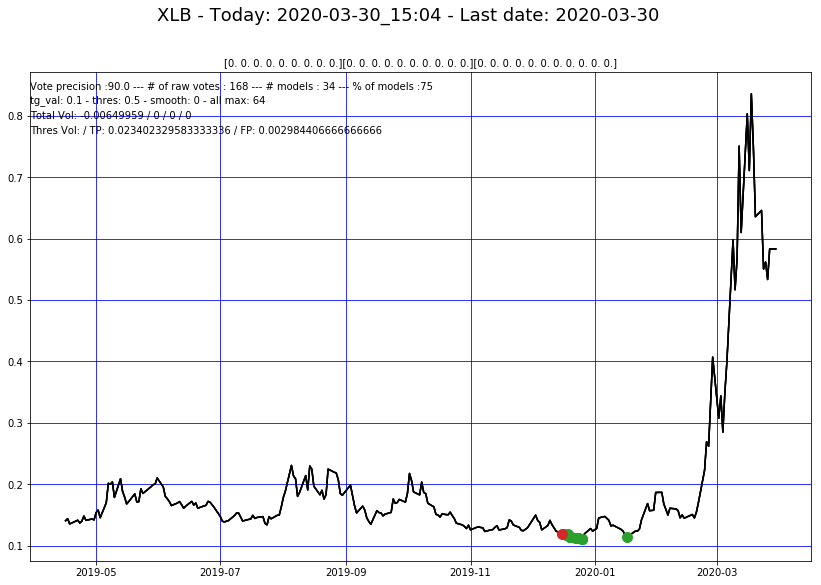

*****
* Done * : XLI  --- TG Value: 0.1  --- Smooth: 0 Process time:  0:45:02
Vote precision :99.0 --- # of raw votes : 54 # models : 11 --- % of models :24
------------------------------------------------------------------------


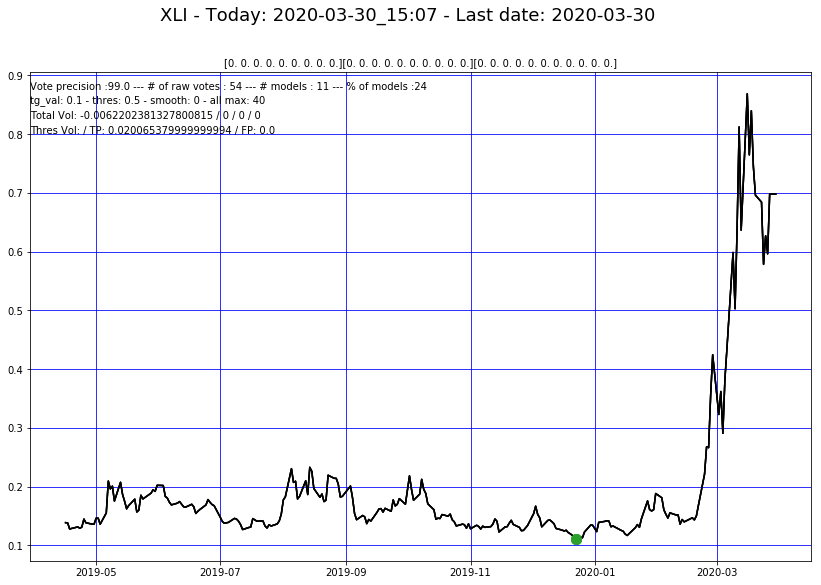

*****
******* Done *******


In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas
import time
from datetime import datetime
import talib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

filename = '2020-03-30_v1'
global tg_val 
tg_val = -0.03
trainsize = 0.7
smooth = 1
timestp = str(datetime.now().microsecond)


report_df = pandas.DataFrame(columns=('SYM', 'VOTES', 'VOTES_9', 'VOTES_10', 'VOTES_11', 'SMOOTH', 'TG_VAL', 'VOTES_INCL', 'ROLLNUM', 'THRES', 'TRUE_VAL', 'FALSE_VAL', 
                                      'TOTAL_VAL', 'TOTAL_VAL_ALL', 'COUNT_9', 'COUNT_10', 'COUNT_11', 'COUNT_POSITIVE', 'COUNT_NEGATIVE', 'COUNT_TOTAL', 'PRECISION', '%MODELS'))


beginning = datetime.now().replace(microsecond=0)
print('Starting ...')

for smooth in [0, ]:

    #for tg_val in [-0.05, -0.03, -0.01, 0.0, 0.01, 0.03, 0.05]:
    for tg_val in [-0.05, 0.05, 0.1 ]:
    
#         print('TG Value: '+str(tg_val), ' --- Smooth: '+str(smooth) )
        

        #for file in ['XLP', 'XME', 'XOP', 'XLV', 'OIH', 'XBI', 'XLE', 'KRE', 'QQQ', 'GDXJ', 'INDA', 'IBB', 'SMH', 'XLB', 'XLF', 'XLK', 'XLI', 'XRT', 'GDX', 
        #             'VNQ', 'XLU', 'IWM', 'SPY', 'RSX', 'EWW', 'EWH', 'KWEB', 'EEM', 'FXI']:
        #for file in ['XLP', 'XLF', 'XLK', 'SPY', 'KWEB', 'XRT', 'XBI', 'XLV', 'IWM',  'XLB', 'XLI']:
        for file in ['XBI', 'XLV', 'IWM',  'XLB', 'XLI']:
            
            #prepare results arrays
            pr_votes=0.0
            votes = 0  
            votes_9 = 0
            votes_10 = 0
            votes_11 = 0
            temp_df = pandas.read_csv('../data/'+ file+filename+'_dp.csv', index_col=0)
            temp_df.drop(temp_df.index[0:40], inplace = True)
            temp_df.drop(temp_df.index[0:239], inplace = True)
            if smooth == 1:  temp_df.drop(temp_df.index[0:2], inplace = True)
            train_len = int(len(temp_df)*trainsize)
            result_ar = np.zeros((len(temp_df[train_len:len(temp_df)]), ))
            result_ar_9 = np.copy(result_ar)
            result_ar_10 = np.copy(result_ar)
            result_ar_11 = np.copy(result_ar)
            res_test_df_9 = np.copy(result_ar)
            res_test_df_10 = np.copy(result_ar)
            res_test_df_11 = np.copy(result_ar)

            #res_test_df = temp_df[train_len:len(temp_df)]


            for shift in [40, 30, 20, 10, 0]: #10, 20, 30, 40

                for timef in [9,10,11]: #4, 5, 6, 10, 20
                    rf_data = pandas.read_csv('../data/'+ file+filename+'_dp.csv', index_col=0)

                    #Run windows
                    if shift > 0:
                        rf_data.drop(rf_data.index[0:shift], inplace = True)

                    #Smooting
                    if smooth == 1:
                        smooth_iv = talib.EMA(rf_data["close_iv"].values, timeperiod=3)
                        smooth_hv = talib.EMA(rf_data["close_hv"].values, timeperiod=3)
                        rf_data = rf_data.assign(close_iv=smooth_iv)
                        rf_data = rf_data.assign(close_hv=smooth_hv)
                        rf_data.drop(rf_data.index[0:2], inplace = True)



                    # Create target , parse_dates=True
                    forecast = timef #timef
                    rf_data['Forecast'] = rf_data['close_iv'] 
                    rf_data['Forecast'] = rf_data['Forecast'].shift(-forecast)

                    def target(row):
                        tg = (row['Forecast'] - row['close_iv'])/ row['close_iv']
                        if tg_val >= 0:
                            if tg >= tg_val:
                                tg = 1
                            else:
                                tg = 0
                            return tg

                        if tg_val < 0:
                            if tg <= tg_val:
                                tg = 1
                            else:
                                tg = 0
                            return tg                

                    rf_data['Target'] = rf_data.apply(target, axis=1) 



                    # Create features    
                    close_iv = rf_data["close_iv"].values
                    close_hv = rf_data["close_hv"].values

                    minv30_iv, maxv30_iv = talib.MINMAX(close_iv, timeperiod=30)
                    minv60_iv, maxv60_iv = talib.MINMAX(close_iv, timeperiod=60)
                    minv120_iv, maxv120_iv = talib.MINMAX(close_iv, timeperiod=120)
                    minv240_iv, maxv240_iv = talib.MINMAX(close_iv, timeperiod=240)

                    minv30_hv, maxv30_hv = talib.MINMAX(close_hv, timeperiod=30)
                    minv60_hv, maxv60_hv = talib.MINMAX(close_hv, timeperiod=60)
                    minv120_hv, maxv120_hv = talib.MINMAX(close_hv, timeperiod=120)
                    minv240_hv, maxv240_hv = talib.MINMAX(close_hv, timeperiod=240)

                    rf_data = rf_data.assign(MINV30=minv30_iv)
                    rf_data = rf_data.assign(MAXV30=maxv30_iv)
                    rf_data = rf_data.assign(MINV60=minv60_iv)
                    rf_data = rf_data.assign(MAXV60=maxv60_iv)
                    rf_data = rf_data.assign(MINV120=minv120_iv)
                    rf_data = rf_data.assign(MAXV120=maxv120_iv)
                    rf_data = rf_data.assign(MINV240=minv240_iv)
                    rf_data = rf_data.assign(MAXV240=maxv240_iv)

                    rf_data = rf_data.assign(MINV30_hv=minv30_hv)
                    rf_data = rf_data.assign(MAXV30_hv=maxv30_hv)            
                    rf_data = rf_data.assign(MINV60_hv=minv60_hv)
                    rf_data = rf_data.assign(MAXV60_hv=maxv60_hv)
                    rf_data = rf_data.assign(MINV120_hv=minv120_hv)
                    rf_data = rf_data.assign(MAXV120_hv=maxv120_hv)
                    rf_data = rf_data.assign(MINV240_hv=minv240_hv)
                    rf_data = rf_data.assign(MAXV240_hv=maxv240_hv)   

                     # IV Rank Calc        
                    def ivrank30(row):
                        ivrank30 = 100*(row['close_iv'] - row['MINV30'])/(row['MAXV30'] - row['MINV30'])
                        return ivrank30

                    def ivrank60(row):
                        ivrank60 = 100*(row['close_iv'] - row['MINV60'])/(row['MAXV60'] - row['MINV60'])
                        return ivrank60

                    def ivrank120(row):
                        ivrank120 = 100*(row['close_iv'] - row['MINV120'])/(row['MAXV120'] - row['MINV120'])
                        return ivrank120

                    def ivrank240(row):
                        ivrank240 = 100*(row['close_iv'] - row['MINV240'])/(row['MAXV240'] - row['MINV240'])
                        return ivrank240

                    rf_data['IVRANK30'] = rf_data.apply(ivrank30, axis=1)
                    rf_data['IVRANK60'] = rf_data.apply(ivrank60, axis=1)
                    rf_data['IVRANK120'] = rf_data.apply(ivrank120, axis=1)
                    rf_data['IVRANK240'] = rf_data.apply(ivrank240, axis=1)

                    def ivrank30_hv(row):
                        ivrank30_hv = 100*(row['close_hv'] - row['MINV30_hv'])/(row['MAXV30_hv'] - row['MINV30_hv'])
                        return ivrank30_hv

                    def ivrank60_hv(row):
                        ivrank60_hv = 100*(row['close_hv'] - row['MINV60_hv'])/(row['MAXV60_hv'] - row['MINV60_hv'])
                        return ivrank60_hv

                    def ivrank120_hv(row):
                        ivrank120_hv = 100*(row['close_hv'] - row['MINV120_hv'])/(row['MAXV120_hv'] - row['MINV120_hv'])
                        return ivrank120_hv

                    def ivrank240_hv(row):
                        ivrank240_hv = 100*(row['close_hv'] - row['MINV240_hv'])/(row['MAXV240_hv'] - row['MINV240_hv'])
                        return ivrank240_hv

                    rf_data['IVRANK30_hv'] = rf_data.apply(ivrank30_hv, axis=1)            
                    rf_data['IVRANK60_hv'] = rf_data.apply(ivrank60_hv, axis=1)
                    rf_data['IVRANK120_hv'] = rf_data.apply(ivrank120_hv, axis=1)
                    rf_data['IVRANK240_hv'] = rf_data.apply(ivrank240_hv, axis=1)

                    #***** Delete data not needed
                    rf_data.drop(rf_data.index[0:239], inplace = True)
                    rf_data = rf_data.fillna(0)

                    #***** Make Train + Test data sets  
                    train_size = int(len(rf_data) * trainsize) #0.7
                    test_size = len(rf_data) - train_size
                    rf_train_df, rf_test_df = rf_data[0:train_size], rf_data[train_size:len(rf_data)]

                    globals()['rf_test_df_{}'.format(shift)] = rf_test_df


                    features = rf_data.columns[10:]

                    rf_X = rf_train_df[features]
                    rf_Y = rf_train_df['Target']
                    rf_Xv = rf_test_df[features]
                    rf_Yv = rf_test_df['Target']

                    #***** Train and report
                    for esti in [500, ]:
                        esti_pr = 0
                        esti_c = 0
                        tp_r = 0
                        tp_c = 0
                        for mfea in [1,2,3]: #1,2,3, 4, 5, 6, 9, 12, 
                            esti_c = esti_c + 1
                            tp_c = tp_c + 1
                            iii = 0
                            pr=0.0

                            tn=0
                            fp=0
                            fn=0
                            tp=0
                            while iii < 5:

                                iii = iii + 1
                                modelref = RandomForestClassifier(n_estimators=esti, max_features=mfea, n_jobs=-1)
                                modelref.fit(rf_X, rf_Y)
                                rf_Ypred = modelref.predict(rf_Xv)

                                tn = tn + confusion_matrix(rf_Yv, rf_Ypred).ravel()[0]
                                fp = fp + confusion_matrix(rf_Yv, rf_Ypred).ravel()[1]
                                fn = fn + confusion_matrix(rf_Yv, rf_Ypred).ravel()[2]                         
                                tp = tp + confusion_matrix(rf_Yv, rf_Ypred).ravel()[3]

                                preci = confusion_matrix(rf_Yv, rf_Ypred).ravel()[3]/(confusion_matrix(rf_Yv, rf_Ypred).ravel()[3]+confusion_matrix(rf_Yv, rf_Ypred).ravel()[1])

                                if preci > 0.64:
                                    votes = votes + 1
                                    if timef == 9:
                                        votes_9 = votes_9 + 1
                                        np.add(rf_Ypred[len(rf_Ypred) - len(result_ar_9): ], result_ar_9, result_ar_9)
                                        #res_test_df_9 = rf_test_df.tail(len(result_ar_9))

                                    if timef == 10:
                                        votes_10 = votes_10 + 1
                                        np.add(rf_Ypred[len(rf_Ypred) - len(result_ar_10): ], result_ar_10, result_ar_10)
                                        #res_test_df_10 = rf_test_df.tail(len(result_ar_10))

                                    if timef == 11:
                                        votes_11 = votes_11 + 1
                                        np.add(rf_Ypred[len(rf_Ypred) - len(result_ar_11): ], result_ar_11, result_ar_11)
                                        #res_test_df_11 = rf_test_df.tail(len(result_ar_11))

                                    if preci!=preci:
                                        pr_votes=pr_votes + 1
                                    else:
                                        pr_votes = pr_votes + preci

                                if preci!=preci:
                                    pr=pr + 1
                                else:
                                    pr = pr + preci

#                             print(file,"\t", "S:", shift , "T:", timef, "P:",esti, mfea,  "\t\tTN, FP, FN, TP: ", round(tn/iii,1), round(fp/iii,1), round(fn/iii,1), round(tp/iii,1), "\tPreci: ", round(100*pr/iii)   ) 
                            #report_df = report_df.append({'SHIFT': shift, 'SYM': file, 'TF': timef, 'ESTI': esti, 'MAXFEA': mfea, 'TN': tn/iii, 'FP': fp/iii, 'FN': fn/iii, 'TP': tp/iii, 'PRE': round(100*pr/iii, 1)}, ignore_index=True)
                            #report_df.to_csv('Report-190120v2.csv', encoding='utf-8', mode = 'w',sep = ';', header=True, decimal=',')
            ending = datetime.now().replace(microsecond=0)
            #print(, 'Process time: ', ending - beginning)
            print('* Done * :', file, ' --- TG Value: '+str(tg_val), ' --- Smooth: '+str(smooth), 'Process time: ', ending - beginning)
            vote_precision = round(100*pr_votes/votes) if votes > 0 else 0
            v_pre = 'Vote precision :' + str(vote_precision) + ' --- # of raw votes : ' + str(votes)
            #print(v_pre)
            percent_models = round(votes/225*100)
            v_pro = '# models : ' + str(round(votes/5)) + ' --- % of models :' + str(percent_models)
            print(v_pre, v_pro)
            print('------------------------------------------------------------------------')
            
            #******

            #for votes_incl in [5, 10, 20, 50, 100]:
            for votes_incl in [0,  ]:
                if votes > votes_incl:
                    #for rollnum in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    for rollnum in [ 0,  ]:

                    
                        predict_9 = 'No tf9'
                        predict_10 = 'No tf10'
                        predict_11 = 'No tf11'
                        diff_pr_9 = 0
                        diff_pr_10 = 0
                        diff_pr_11 = 0
                        diff_pr_9_tp = 0
                        diff_pr_10_tp = 0
                        diff_pr_11_tp = 0
                        diff_pr_9_fp = 0
                        diff_pr_10_fp = 0
                        diff_pr_11_fp = 0
                        con_9 = 0
                        con_10 = 0
                        con_11 = 0
                        con_9_tp = 0
                        con_10_tp = 0
                        con_11_tp = 0
                        con_9_fp = 0
                        con_10_fp = 0
                        con_11_fp = 0
                        
                        def diff_pre(row):
                            #if row['prediction'] > votes_incl:                    
                            diff_p =  row['Forecast'] - row['close_iv']
                            return diff_p

                        def signal(row):
                            if row['prediction'] > 0:
                                return 1

                        if votes_9 > 0:
                            res_test_df_9 = rf_test_df.tail(len(result_ar_9))
                            res_test_df_9 = res_test_df_9.assign(prediction=result_ar_9)
                            res_test_df_9['date2'] = pandas.to_datetime(res_test_df_9.index)
                            res_test_df_9['diff_pr'] = res_test_df_9.apply(diff_pre, axis=1)
                            diff_pr_9_total = res_test_df_9['diff_pr'].sum()/res_test_df_9['diff_pr'].count() if res_test_df_9['diff_pr'].count() > 0 else 0.0
                            res_test_df_9['signal'] = res_test_df_9.apply(signal, axis=1)
                            res_test_df_9['Target2'] = pandas.DataFrame(res_test_df_9['signal']).rolling(10, min_periods=1).sum().fillna(0) 

                        if votes_10 > 0:
                            res_test_df_10 = rf_test_df.tail(len(result_ar_10))
                            res_test_df_10 = res_test_df_10.assign(prediction=result_ar_10)
                            res_test_df_10['date2'] = pandas.to_datetime(res_test_df_10.index)
                            res_test_df_10['diff_pr'] = res_test_df_10.apply(diff_pre, axis=1)
                            diff_pr_10_total = res_test_df_10['diff_pr'].sum()/res_test_df_10['diff_pr'].count() if res_test_df_10['diff_pr'].count() > 0 else 0.0
                            res_test_df_10['signal'] = res_test_df_10.apply(signal, axis=1)
                            res_test_df_10['Target2'] = pandas.DataFrame(res_test_df_10['signal']).rolling(10, min_periods=1).sum().fillna(0)

                        if votes_11 > 0:
                            res_test_df_11 = rf_test_df.tail(len(result_ar_11))
                            res_test_df_11 = res_test_df_11.assign(prediction=result_ar_11)
                            res_test_df_11['date2'] = pandas.to_datetime(res_test_df_11.index)
                            res_test_df_11['diff_pr'] = res_test_df_11.apply(diff_pre, axis=1)
                            diff_pr_11_total = res_test_df_11['diff_pr'].sum()/res_test_df_11['diff_pr'].count() if res_test_df_11['diff_pr'].count() > 0 else 0.0
                            res_test_df_11['signal'] = res_test_df_11.apply(signal, axis=1)
                            res_test_df_11['Target2'] = pandas.DataFrame(res_test_df_11['signal']).rolling(10, min_periods=1).sum().fillna(0)

                        diff_pr_total = (diff_pr_9_total + diff_pr_10_total + diff_pr_11_total)/3

                        for thres in [ 0.5, ]: #, 0.1, 0.3, 0.5, 0.7, 0.9, 0.98

                            all_max = str(int(max(np.amax(result_ar_9),np.amax(result_ar_10),np.amax(result_ar_11 ))))

                            plt.figure(figsize=(14,9))

                            if votes_9 > 0:
                                thres_9 = str(int(np.amax(result_ar_9)*thres))
                                #diff_pr_9 = res_test_df_9.query('Target == 1 and prediction > '+thres_9)
                                true_p_9 = res_test_df_9.query('Target == 1 and prediction > '+thres_9+' and Target2 >='+str(rollnum))
                                #false_p_9 = res_test_df_9.query('Target == 0 and prediction > '+thres_9+'and forecast != 0.0')
                                false_p_9 = res_test_df_9.query('Target == 0 and prediction > '+thres_9+'and Forecast != 0.0 and Target2 >='+str(rollnum))

                                signals_9 = res_test_df_9.tail(9).query('prediction > '+thres_9)

                                diff_pr_9_tp = true_p_9['diff_pr'].sum()/true_p_9['diff_pr'].count() if true_p_9['diff_pr'].count() > 0 else 0.0
                                diff_pr_9_fp = false_p_9['diff_pr'].sum()/false_p_9['diff_pr'].count() if false_p_9['diff_pr'].count() > 0 else 0.0

                                plt.plot(res_test_df_9['date2'],res_test_df_9['close_iv'], color='black')

                                plt.plot_date(true_p_9['date2'],true_p_9['close_iv'], color='tab:green', marker='o', markersize=10)
                                plt.plot_date(false_p_9['date2'],false_p_9['close_iv'], color='tab:red', marker='o', markersize=10)
                                plt.plot_date(signals_9['date2'],signals_9['close_iv'], color='tab:cyan', marker='o', markersize=10)

                                predict_9 = str(res_test_df_9.tail(9)['prediction'].ravel())
                                con_9_tp = true_p_9['diff_pr'].count() if true_p_9['diff_pr'].count() > 0 else 0.0
                                con_9_fp = false_p_9['diff_pr'].count() if false_p_9['diff_pr'].count() > 0 else 0.0


                            if votes_10 > 0:
                                thres_10 = str(int(np.amax(result_ar_10)*thres))
                                #true_p_10 = res_test_df_10.query('Target == 1 and prediction > '+thres_10)
                                true_p_10 = res_test_df_10.query('Target == 1 and prediction > '+thres_10+'and Target2 >='+str(rollnum))
                                #false_p_10 = res_test_df_10.query('Target == 0 and prediction > '+thres_10+'and forecast != 0.0')
                                false_p_10 = res_test_df_10.query('Target == 0 and prediction > '+thres_10+'and Forecast != 0.0 and Target2 >='+str(rollnum))

                                signals_10 = res_test_df_10.tail(10).query('prediction > '+thres_10)


                                diff_pr_10_tp = true_p_10['diff_pr'].sum()/true_p_10['diff_pr'].count() if true_p_10['diff_pr'].count() > 0 else 0.0
                                diff_pr_10_fp = false_p_10['diff_pr'].sum()/false_p_10['diff_pr'].count() if false_p_10['diff_pr'].count() > 0 else 0.0

                                plt.plot(res_test_df_10['date2'],res_test_df_10['close_iv'], color='black')

                                plt.plot_date(true_p_10['date2'],true_p_10['close_iv'], color='tab:green', marker='o', markersize=10)
                                plt.plot_date(false_p_10['date2'],false_p_10['close_iv'], color='tab:red', marker='o', markersize=10)
                                plt.plot_date(signals_10['date2'],signals_10['close_iv'], color='tab:cyan', marker='o', markersize=10)

                                predict_10 = str(res_test_df_10.tail(10)['prediction'].ravel())
                                con_10_tp = true_p_10['diff_pr'].count() if true_p_10['diff_pr'].count() > 0 else 0.0
                                con_10_fp = false_p_10['diff_pr'].count() if false_p_10['diff_pr'].count() > 0 else 0.0


                            if votes_11 > 0:
                                thres_11 = str(int(np.amax(result_ar_11)*thres))
                                #true_p_11 = res_test_df_11.query('Target == 1 and prediction > '+thres_11)
                                true_p_11 = res_test_df_11.query('Target == 1 and prediction > '+thres_11+'and Target2 >='+str(rollnum))
                                #false_p_11 = res_test_df_11.query('Target == 0 and prediction > '+thres_11+'and forecast != 0.0')
                                false_p_11 = res_test_df_11.query('Target == 0 and prediction > '+thres_11+'and Forecast != 0.0 and Target2 >='+str(rollnum))
                                signals_11 = res_test_df_11.tail(11).query('prediction > '+thres_11)

                                diff_pr_11_tp = true_p_11['diff_pr'].sum()/true_p_11['diff_pr'].count() if true_p_11['diff_pr'].count() > 0 else 0.0
                                diff_pr_11_fp = false_p_11['diff_pr'].sum()/false_p_11['diff_pr'].count() if false_p_11['diff_pr'].count() > 0 else 0.0

                                plt.plot(res_test_df_11['date2'],res_test_df_11['close_iv'], color='black')

                                plt.plot_date(true_p_11['date2'],true_p_11['close_iv'], color='tab:green', marker='o', markersize=10)
                                plt.plot_date(false_p_11['date2'],false_p_11['close_iv'], color='tab:red', marker='o', markersize=10)
                                plt.plot_date(signals_11['date2'],signals_11['close_iv'], color='tab:cyan', marker='o', markersize=10)

                                predict_11 = str(res_test_df_11.tail(11)['prediction'].ravel())
                                con_11_tp = true_p_11['diff_pr'].count() if true_p_11['diff_pr'].count() > 0 else 0.0
                                con_11_fp = false_p_11['diff_pr'].count() if false_p_11['diff_pr'].count() > 0 else 0.0
                                
                            if tg_val >= 0:
                                diff_pr_total_tp = (diff_pr_9_tp + diff_pr_10_tp + diff_pr_11_tp)/3
                                diff_pr_total_fp = (diff_pr_9_fp + diff_pr_10_fp + diff_pr_11_fp)/3
                            else:
                                diff_pr_total_tp = ((diff_pr_9_tp + diff_pr_10_tp + diff_pr_11_tp)*-1)/3
                                diff_pr_total_fp = ((diff_pr_9_fp + diff_pr_10_fp + diff_pr_11_fp)*-1)/3

                            plt.grid(b=True, which='both', color='b', linestyle='-', axis='both')

                            predict = predict_9 + predict_10 + predict_11
                            plt.title(predict, fontsize=10)

                            if votes_9 > 0:                     
                                plt.suptitle(file+' - Today: '+datetime.today().strftime("%Y-%m-%d_%H:%M")+' - Last date: '+res_test_df_9.tail(1)['date2'][0].strftime("%Y-%m-%d"), fontsize=18)
                            elif votes_10 > 0:
                                plt.suptitle(file+' - Today: '+datetime.today().strftime("%Y-%m-%d_%H:%M")+' - Last date: '+res_test_df_10.tail(1)['date2'][0].strftime("%Y-%m-%d"), fontsize=18)
                            elif votes_11 > 0:
                                plt.suptitle(file+' - Today: '+datetime.today().strftime("%Y-%m-%d_%H:%M")+' - Last date: '+res_test_df_11.tail(1)['date2'][0].strftime("%Y-%m-%d"), fontsize=18)

                            plt.annotate(v_pre + ' --- ' + v_pro, xy=(0, 0.96), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='bottom')
                            plt.annotate('tg_val: ' + str(tg_val) + ' - thres: '+str(thres)+ ' - smooth: '+str(smooth)+' - all max: '+all_max, xy=(0, 0.93), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='bottom')
                            plt.annotate('Total Vol: '+str(diff_pr_total)+' / ' + str(diff_pr_9)+' / ' + str(diff_pr_10) +' / ' + str(diff_pr_11), xy=(0, 0.90), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='bottom')
                            plt.annotate('Thres Vol: / TP: '+str(diff_pr_total_tp)+' / FP: ' + str(diff_pr_total_fp), xy=(0, 0.87), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='bottom')
                            plt.savefig('..\\results\\'+file+'-'+str(thres)+'-'+str(rollnum)+'-'+datetime.today().strftime("%Y-%m-%d_%H-%M-%S")+'v4.png')
                            plt.show()

                            #print('Timeframe9:', predict_9, 'Timeframe10:', predict_10, 'Timeframe11:', predict_11)
                            print('*****')
                            
                            
                            

                            #('SYM', 'SMOOTH', 'TG_VAL', 'ROLLNUM', 'THRES', 'TRUE_VAL', 'FALSE_VAL', 'TOTAL_VAL')
                            report_df = report_df.append({'SYM': file, 'VOTES':float(votes), 'VOTES_9': votes_9, 'VOTES_10': votes_10,'VOTES_11': votes_11,
                                                          'SMOOTH':float(smooth), 'TG_VAL':float(tg_val), 'VOTES_INCL':float(votes_incl), 'ROLLNUM':float(rollnum), 'THRES':float(thres), 
                                                          'TRUE_VAL':float(diff_pr_total_tp)*100, 'FALSE_VAL':float(diff_pr_total_fp)*100, 'TOTAL_VAL':float(diff_pr_total_tp+diff_pr_total_fp)*100,
                                                          'TOTAL_VAL_ALL': diff_pr_total*100,
                                                          'COUNT_9':float(con_9_tp+con_9_fp),
                                                          'COUNT_10':float(con_10_tp+con_10_fp),
                                                          'COUNT_11':float(con_11_tp+con_11_fp),
                                                          'COUNT_POSITIVE':float(con_9_tp+con_10_tp+con_11_tp),
                                                          'COUNT_NEGATIVE':float(con_9_fp+con_10_fp+con_11_fp),
                                                          'COUNT_TOTAL':float(con_9_tp+con_9_fp+con_10_tp+con_10_fp+con_11_tp+con_11_fp),
                                                          'PRECISION': vote_precision,
                                                          '%MODELS': percent_models
                                                          }, ignore_index=True)
                            report_df.to_csv('Report-'+datetime.today().strftime("%Y-%m-%d")+'v9.csv', encoding='utf-8', mode = 'w',sep = ';', header=True, decimal=',')
            
#             if votes <= votes_incl:
#                 print(votes, 'Less than ',votes_incl,' votes')
#                 plt.figure(figsize=(14,9))
#                 plt.grid(b=True, which='both', color='b', linestyle='-', axis='both')

#                 plt.suptitle(file+' - Today: '+datetime.today().strftime("%Y-%m-%d_%H:%M"), fontsize=18)
#                 plt.annotate(v_pre + ' --- ' + v_pro, xy=(0, 0.96), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='bottom')
#                 #plt.grid(b=True, which='both', color='b', linestyle='-', axis='both')

#                 if votes_9 > 0:
#                     res_test_df_9 = rf_test_df.tail(len(result_ar_9))
#                     plt.plot_date(res_test_df_9.index,res_test_df_9['close_iv'], color='black')
#                 elif votes_10 > 0:
#                     res_test_df_10 = rf_test_df.tail(len(result_ar_10))
#                     plt.plot_date(res_test_df_10.index,res_test_df_10['close_iv'], color='black')
#                 elif votes_11 > 0:
#                     res_test_df_11 = rf_test_df.tail(len(result_ar_11))
#                     plt.plot_date(res_test_df_11.index,res_test_df_11['close_iv'], color='black')

#                 plt.savefig('..\\results\\'+file+'-'+' NO VOTES '+'-'+datetime.today().strftime("%Y-%m-%d_%H-%M-%S")+'.png')
#                 plt.show()

print('******* Done *******')

In [18]:
res_test_df_11.tail(120)

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv,prediction,date2,diff_pr,signal,Target2
2019-09-09,0.240150,0.240150,0.240150,0.240150,0.228212,0.260771,0.228212,0.248738,0.270914,0,...,17.427269,89.232361,63.887871,78.731267,34.822534,0.0,2019-09-09,0.022177,NaN,5.0
2019-09-10,0.242515,0.242515,0.242515,0.242515,0.247642,0.251055,0.236276,0.245658,0.262548,0,...,16.089893,96.908811,69.383994,81.604612,35.972225,0.0,2019-09-10,0.016890,NaN,4.0
2019-09-11,0.246769,0.246769,0.246769,0.246769,0.243594,0.259278,0.232911,0.248373,0.271978,0,...,17.268716,100.000000,79.269627,87.524963,38.040122,0.0,2019-09-11,0.023605,NaN,3.0
2019-09-12,0.241515,0.241515,0.241515,0.241515,0.251008,0.251008,0.241420,0.243134,0.277836,0,...,14.993794,84.597490,67.060114,79.919041,35.486111,0.0,2019-09-12,0.034702,NaN,2.0
2019-09-13,0.238419,0.238419,0.238419,0.238419,0.246071,0.246071,0.235927,0.241404,0.275867,0,...,14.242381,75.523497,59.867194,75.534061,33.981481,0.0,2019-09-13,0.034464,NaN,1.0
2019-09-16,0.236483,0.236483,0.236483,0.236483,0.246722,0.264644,0.246722,0.259167,0.295488,0,...,21.956433,62.586599,60.573028,72.790639,33.040122,0.0,2019-09-16,0.036321,NaN,1.0
2019-09-17,0.234038,0.234038,0.234038,0.234038,0.252040,0.269676,0.252040,0.262723,0.320840,0,...,23.500622,48.291443,58.488924,69.327636,31.851853,0.0,2019-09-17,0.058117,NaN,0.0
2019-09-18,0.239292,0.239292,0.239292,0.239292,0.265644,0.280280,0.261834,0.268613,0.307838,0,...,26.058183,68.516051,78.082834,76.770853,34.405864,0.0,2019-09-18,0.039226,NaN,0.0
2019-09-19,0.241435,0.241435,0.241435,0.241435,0.266025,0.273899,0.257659,0.260136,0.283725,0,...,22.376946,76.404505,84.364831,79.806609,35.447532,0.0,2019-09-19,0.023590,NaN,0.0
2019-09-20,0.240562,0.240562,0.240562,0.240562,0.253198,0.262358,0.250611,0.252405,0.292853,0,...,19.019717,70.490574,81.805495,78.569818,35.023148,0.0,2019-09-20,0.040448,NaN,0.0


In [1]:
# if res_test_df_9.all() == 0:
#     print('hello')
# result_ar_11
# votes
# plt.plot(res_test_df_10.index,res_test_df_10['close_iv'], color='black')
true_p_9 = res_test_df_9.query('Target == 1 and prediction > '+thres_9)

NameError: name 'res_test_df_9' is not defined

In [21]:
res_test_df_9.query('Target == 0 and prediction > '+thres_9+'and Forecast != 0.0' ) 
                    #and Target2 =='+str(rollnum)

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,IVRANK120,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv,prediction,date2,diff_pr,Target2
2019-08-01,0.160888,0.160888,0.160888,0.157548,0.173604,0.236086,0.165492,0.192802,0.217782,0,...,43.452806,26.216549,5.015512,3.662161,6.480172,4.034186,28.0,2019-08-01,0.024980,0.0
2019-08-02,0.148760,0.148760,0.148760,0.153154,0.207607,0.212417,0.195844,0.195038,0.208440,0,...,46.146932,27.842006,0.000000,0.000000,1.803254,1.122603,27.0,2019-08-02,0.013403,0.0
2019-08-08,0.176921,0.176921,0.176921,0.175736,0.214750,0.216846,0.190827,0.205380,0.214004,0,...,58.613543,35.363535,78.200022,24.476554,25.838433,16.085537,28.0,2019-08-08,0.008624,0.0
2019-08-09,0.178461,0.178461,0.178461,0.177098,0.189859,0.206845,0.189859,0.199064,0.217076,0,...,51.000495,30.770325,82.919513,25.953752,27.288993,16.988573,26.0,2019-08-09,0.018012,0.0
2019-08-12,0.183398,0.183398,0.183398,0.180248,0.196399,0.217354,0.196399,0.207733,0.217953,0,...,61.449887,37.074797,93.827653,29.367992,30.641666,19.075757,28.0,2019-08-12,0.010220,0.0
2019-08-13,0.172572,0.172572,0.172572,0.176410,0.216354,0.216497,0.198781,0.206035,0.216121,0,...,59.403113,35.839909,83.019703,25.207628,26.556324,16.532455,28.0,2019-08-13,0.010087,0.0
2020-02-07,0.295615,0.295615,0.295615,0.293269,0.220941,0.225402,0.214369,0.223043,0.241436,0,...,72.691296,72.691296,100.000000,100.000000,100.000000,100.000000,27.0,2020-02-07,0.018392,0.0


In [16]:
true_p_11#['diff_pr'].sum() pandas.Series(result_ar_11).rolling(10, min_periods=1).sum().values

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,IVRANK60,IVRANK120,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv,prediction,date2,diff_pr
2019-03-27,0.188923,0.188923,0.188923,0.188864,0.194860,0.196606,0.190589,0.194174,0.177183,1,...,8.609878,4.684841,22.065017,100.000000,11.923321,9.856250,10.318273,5.0,2019-03-27,-0.016991
2019-05-08,0.191081,0.191081,0.191081,0.184750,0.229847,0.234276,0.223735,0.218658,0.204956,1,...,100.000000,42.801269,41.130796,88.999187,78.777151,22.058446,22.058446,5.0,2019-05-08,-0.013702
2019-05-09,0.207607,0.207607,0.207607,0.196178,0.232657,0.278264,0.232657,0.233547,0.202106,1,...,100.000000,56.195928,52.725357,100.000000,100.000000,29.631240,29.631240,5.0,2019-05-09,-0.031440
2019-05-10,0.211306,0.211306,0.211306,0.203742,0.248515,0.255516,0.214052,0.226053,0.205166,1,...,88.004313,49.571830,46.890199,100.000000,100.000000,34.643072,34.643072,5.0,2019-05-10,-0.020887
2019-05-13,0.228514,0.228514,0.228514,0.216128,0.218259,0.259770,0.218259,0.239713,0.205053,1,...,100.000000,61.889467,57.527315,100.000000,100.000000,42.850153,42.850153,5.0,2019-05-13,-0.034660
2019-05-14,0.230752,0.230752,0.230752,0.223440,0.253818,0.253818,0.224164,0.233272,0.207751,1,...,90.614985,56.081131,52.511422,100.000000,100.000000,48.117654,47.695267,5.0,2019-05-14,-0.025521
2019-05-15,0.230641,0.230641,0.230641,0.227040,0.224402,0.227005,0.203956,0.219479,0.206655,1,...,70.518179,43.643325,41.770531,100.000000,100.000000,50.778573,50.081005,5.0,2019-05-15,-0.012824
2019-08-06,0.178556,0.178556,0.178556,0.169972,0.251928,0.251928,0.217830,0.222875,0.193492,1,...,79.702754,79.702754,48.087369,41.449980,18.228794,19.703337,12.266176,5.0,2019-08-06,-0.029383
2019-08-07,0.179128,0.179128,0.179128,0.174550,0.225021,0.234641,0.215893,0.219614,0.192366,1,...,82.150803,75.772315,45.716002,66.491515,23.191213,24.576270,15.299786,5.0,2019-08-07,-0.027248
2020-01-31,0.277296,0.277296,0.277296,0.270759,0.234943,0.273946,0.234943,0.250981,0.195826,1,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.0,2020-01-31,-0.055155


In [54]:
res_test_df_10['Target2'] = pandas.DataFrame(res_test_df_10['Target']).rolling(10, min_periods=1).sum().fillna(0) #res_test_df_10  , min_periods=1
res_test_df_10['Target2'] = roll
res_test_df_10['Target2']

2019-03-27    1.0
2019-03-28    2.0
2019-03-29    3.0
2019-04-01    4.0
2019-04-02    5.0
2019-04-03    6.0
2019-04-04    7.0
2019-04-05    8.0
2019-04-08    8.0
2019-04-09    8.0
2019-04-10    7.0
2019-04-11    6.0
2019-04-12    5.0
2019-04-15    4.0
2019-04-16    3.0
2019-04-17    2.0
2019-04-18    1.0
2019-04-22    0.0
2019-04-23    0.0
2019-04-24    0.0
2019-04-25    0.0
2019-04-26    0.0
2019-04-29    0.0
2019-04-30    0.0
2019-05-01    0.0
2019-05-02    0.0
2019-05-03    0.0
2019-05-06    0.0
2019-05-07    0.0
2019-05-08    1.0
             ... 
2020-01-16    0.0
2020-01-17    0.0
2020-01-21    0.0
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-27    1.0
2020-01-28    2.0
2020-01-29    3.0
2020-01-30    4.0
2020-01-31    5.0
2020-02-03    6.0
2020-02-04    7.0
2020-02-05    8.0
2020-02-06    8.0
2020-02-07    8.0
2020-02-10    7.0
2020-02-11    6.0
2020-02-12    5.0
2020-02-13    4.0
2020-02-14    3.0
2020-02-18    2.0
2020-02-19    1.0
2020-02-20    0.0
2020-02-21

In [17]:
false_p_11

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,IVRANK60,IVRANK120,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv,prediction,date2,diff_pr
2019-05-07,0.190177,0.190177,0.190177,0.178418,0.199336,0.234514,0.199336,0.208436,0.2024,0,...,98.955776,33.606141,33.171393,72.071329,58.718267,17.862877,17.862877,5.0,2019-05-07,-0.006036
2020-02-25,0.317744,0.317744,0.317744,0.311122,0.244325,0.269041,0.235070,0.241436,0.0000,0,...,90.669956,90.669956,90.669956,100.000000,100.000000,100.000000,100.000000,5.0,2020-02-25,-0.241436
2020-02-26,0.321903,0.321903,0.321903,0.316513,0.259056,0.259056,0.237911,0.249667,0.0000,0,...,98.715532,98.715532,98.715532,100.000000,100.000000,100.000000,100.000000,5.0,2020-02-26,-0.249667
2020-02-27,0.321903,0.321903,0.321903,0.319208,0.254500,0.298584,0.254500,0.272561,0.0000,0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.0,2020-02-27,-0.272561
2020-02-28,0.321903,0.321903,0.321903,0.320556,0.254500,0.298584,0.254500,0.284009,0.0000,0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.0,2020-02-28,-0.284009


In [47]:
res_test_df_10.query('Target == 1 and prediction > '+thres_9+'and Forecast != 0')

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,IVRANK120,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv,prediction,date2,diff_pr,Target2
2019-03-27,0.188923,0.188923,0.188923,0.188864,0.194860,0.196606,0.190589,0.194174,0.177183,1,...,4.684841,22.065017,100.000000,11.923321,9.856250,10.318273,2.0,2019-03-27,None,0.0
2019-05-08,0.191081,0.191081,0.191081,0.184750,0.229847,0.234276,0.223735,0.218658,0.204956,1,...,42.801269,41.130796,88.999187,78.777151,22.058446,22.058446,4.0,2019-05-08,None,0.0
2019-05-09,0.207607,0.207607,0.207607,0.196178,0.232657,0.278264,0.232657,0.233547,0.202106,1,...,56.195928,52.725357,100.000000,100.000000,29.631240,29.631240,4.0,2019-05-09,None,1.0
2019-05-10,0.211306,0.211306,0.211306,0.203742,0.248515,0.255516,0.214052,0.226053,0.205166,1,...,49.571830,46.890199,100.000000,100.000000,34.643072,34.643072,4.0,2019-05-10,None,2.0
2019-05-13,0.228514,0.228514,0.228514,0.216128,0.218259,0.259770,0.218259,0.239713,0.205053,1,...,61.889467,57.527315,100.000000,100.000000,42.850153,42.850153,4.0,2019-05-13,None,3.0
2019-05-14,0.230752,0.230752,0.230752,0.223440,0.253818,0.253818,0.224164,0.233272,0.207751,1,...,56.081131,52.511422,100.000000,100.000000,48.117654,47.695267,4.0,2019-05-14,None,4.0
2019-05-15,0.230641,0.230641,0.230641,0.227040,0.224402,0.227005,0.203956,0.219479,0.206655,1,...,43.643325,41.770531,100.000000,100.000000,50.778573,50.081005,4.0,2019-05-15,None,5.0
2019-08-06,0.178556,0.178556,0.178556,0.169972,0.251928,0.251928,0.217830,0.222875,0.193492,1,...,79.702754,48.087369,41.449980,18.228794,19.703337,12.266176,3.0,2019-08-06,None,1.0
2019-08-07,0.179128,0.179128,0.179128,0.174550,0.225021,0.234641,0.215893,0.219614,0.192366,1,...,75.772315,45.716002,66.491515,23.191213,24.576270,15.299786,3.0,2019-08-07,None,2.0
2019-08-14,0.188113,0.188113,0.188113,0.182261,0.204305,0.235086,0.204305,0.220195,0.211277,1,...,76.472296,46.138325,100.000000,31.550127,32.784451,20.409733,2.0,2019-08-14,None,3.0


In [48]:

#len = 234
result_ar_10
thres_9

'1'

In [4]:
res_test_df_10

,open_hv,high_hv,low_hv,close_hv,open_iv,high_iv,low_iv,close_iv,Forecast,Target,...,MINV240_hv,MAXV240_hv,IVRANK30,IVRANK60,IVRANK120,IVRANK240,IVRANK30_hv,IVRANK60_hv,IVRANK120_hv,IVRANK240_hv
2019-03-28,0.266692,0.266692,0.266692,0.268077,0.308267,0.308267,0.293869,0.300682,0.274721,1,...,0.194529,0.455975,23.894902,5.980552,4.116432,43.004535,79.409618,11.663401,10.022643,28.131357
2019-03-29,0.268311,0.268311,0.268311,0.268194,0.295012,0.295012,0.283312,0.295410,0.272588,1,...,0.194529,0.455975,3.695345,1.030053,0.636606,40.936043,79.853279,11.917889,10.078639,28.176083
2019-04-01,0.273359,0.273359,0.273359,0.270777,0.289281,0.302695,0.286662,0.297108,0.278545,1,...,0.194529,0.455975,10.200291,3.124741,1.757229,41.602168,89.651450,13.456795,11.315310,29.163864
2019-04-02,0.272280,0.272280,0.272280,0.271528,0.300901,0.302028,0.292853,0.295869,0.278119,1,...,0.194529,0.455975,5.454527,1.939072,0.939664,41.116188,91.027227,13.915154,11.675187,29.451312
2019-04-03,0.273708,0.273708,0.273708,0.272618,0.295806,0.297171,0.287741,0.295012,0.274588,1,...,0.194529,0.455975,2.169288,0.956633,0.373708,40.779771,95.977146,14.804334,12.197201,29.868266
2019-04-04,0.273899,0.273899,0.273899,0.273258,0.299711,0.299711,0.286075,0.292559,0.271370,1,...,0.194529,0.455975,0.000000,0.000000,0.000000,39.817433,98.884611,15.347889,12.503819,30.113175
2019-04-05,0.270454,0.270454,0.270454,0.271856,0.290424,0.294012,0.283122,0.290277,0.268110,1,...,0.194529,0.455975,0.000000,0.000000,0.000000,38.922071,92.517436,14.635687,11.832343,29.576839
2019-04-08,0.251865,0.251865,0.251865,0.261861,0.286535,0.301362,0.279899,0.285303,0.264147,1,...,0.194529,0.455975,0.000000,0.000000,0.000000,36.970215,47.129801,9.389643,7.045806,25.753634
2019-04-09,0.245483,0.245483,0.245483,0.253672,0.279661,0.294361,0.272724,0.280252,0.262173,1,...,0.194529,0.455975,0.000000,0.000000,0.000000,34.988392,9.947495,4.320035,3.124596,22.621601
2019-04-10,0.244912,0.244912,0.244912,0.249292,0.274899,0.283630,0.269835,0.276496,0.256543,1,...,0.194529,0.455975,0.000000,0.000000,0.000000,33.514774,0.000000,1.509417,1.027160,20.946292


In [4]:
#false_p_11['diff_pr'].count()
result_ar_11

array([5., 2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 5., 5., 5., 5., 5., 5.,
       5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 2., 5., 5., 2., 2., 3., 2., 4., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 4., 4., 1., 3., 5., 4., 3., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
pandas.Series(result_ar_11).rolling(10, min_periods=1).sum().values

array([ 5.,  7.,  9., 11., 12., 12., 12., 13., 15., 15., 10.,  8.,  6.,
        4.,  3.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  7., 12., 17., 22., 27., 32., 37., 37., 37., 35., 30.,
       25., 20., 15., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,
        9., 14., 16., 18., 21., 23., 27., 27., 26., 24., 19., 14., 12.,
       11.,  8.,  7.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,  9.,  8.,  7.,  6.,
        5.,  4.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [8]:
pandas.Series(result_ar_11).rolling(10, min_periods=1).max().shift(1).fillna(0).values

array([0., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 2., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 4., 4., 4., 4., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 4.

In [ ]:
Signal hvis number n signal in x time AND 
no signals for z time